# Первое домашнее задание. 
Мягкий дедлайн: 3 мая, жесткий дедлайн: 10 мая. 

Максимальное количество баллов - 30. 

**Задание 1** (10 баллов) 

Рассмотрите две выборки: https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset и https://archive.ics.uci.edu/ml/datasets/Speaker+Accent+Recognition. Для обоих выборок постройте AdaBoost, GradientBoosting, RandomForest, Bagging. Сравните качество на обоих выборках. Отличается ли результат? Почему? 

In [1]:
#libraris
%pip install pandas
%pip install -U scikit-learn 
%pip install surprise
%pip install matplotlib

You should consider upgrading via the '/Users/alexglushko/PycharmProjects/ML-HSE/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/alexglushko/PycharmProjects/ML-HSE/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/alexglushko/PycharmProjects/ML-HSE/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/alexglushko/PycharmProjects/ML-HSE/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
shill_data = pd.read_csv('../datasets/shill_bidding_dataset.csv', sep=',')
shill_data.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1, inplace=True)
shill_data.tail()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0
6320,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.000000,7,0


In [4]:
shill_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.000000
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.000000
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.000000
Last_Bidding,6321.0,0.463119,0.380097,0.000000,0.047928,0.440937,0.860363,0.999900
Auction_Bids,6321.0,0.231606,0.255252,0.000000,0.000000,0.142857,0.454545,0.788235
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000,0.000000,0.000000,0.993593,0.999935
Early_Bidding,6321.0,0.430683,0.380785,0.000000,0.026620,0.360104,0.826761,0.999900
Winning_Ratio,6321.0,0.367731,0.436573,0.000000,0.000000,0.000000,0.851852,1.000000
Auction_Duration,6321.0,4.615093,2.466629,1.000000,3.000000,5.000000,7.000000,10.000000
Class,6321.0,0.106787,0.308867,0.000000,0.000000,0.000000,0.000000,1.000000


In [5]:
shill_data['Class'].value_counts()

Class
0    5646
1     675
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X = shill_data.drop(['Class'], axis=1)
y = shill_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9936758893280633

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9960474308300395

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9944664031620554

In [10]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9960474308300395

In [11]:
accent_data = pd.read_csv('../datasets/accent_mfcc_data_1.csv', sep=',')
accent_data.tail()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275
328,US,3.214254,-3.135152,1.122691,4.712444,5.926518,6.915566,-5.799727,10.858532,-11.659845,10.605734,0.349482,-5.983281


In [12]:
accent_data.drop('language', axis=1).describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
X1,329.0,5.645227,5.105302,-6.067831,2.065603,4.954206,9.793648,17.749851
X2,329.0,-4.270814,3.514350,-14.972962,-6.515764,-4.252512,-1.560250,3.570765
X3,329.0,2.635319,3.635323,-6.186583,0.137042,2.029268,4.178026,17.066487
X4,329.0,7.200207,4.310095,-8.844231,4.700874,7.804680,10.129165,16.178942
X5,329.0,-5.648733,4.596180,-15.656596,-8.417684,-6.786670,-4.463308,7.912809
X6,329.0,9.810236,3.624654,-3.528964,8.643563,10.379330,11.784360,21.445837
X7,329.0,-9.408053,2.484117,-15.365665,-11.120860,-9.710399,-7.989370,-0.424033
X8,329.0,5.117328,2.650608,-2.873862,3.482167,4.843103,6.588931,13.846083
X9,329.0,-1.229432,3.634849,-15.510974,-1.749082,-0.389970,0.779993,4.789989
X10,329.0,-2.362288,5.042034,-11.429178,-5.083522,-3.323147,-1.506037,16.326455


In [13]:
accent_data['language'].describe(include='all').T

count     329
unique      6
top        US
freq      165
Name: language, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X = accent_data.drop(['language'], axis=1)
y = accent_data['language']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

language
US    132
UK     36
GE     24
FR     24
IT     24
ES     23
Name: count, dtype: int64
language
US    33
UK     9
IT     6
GE     6
ES     6
FR     6
Name: count, dtype: int64


In [15]:
from sklearn.ensemble import AdaBoostClassifier


clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.feature_importances_)

0.5
[0.   0.   0.34 0.32 0.   0.   0.   0.   0.   0.34 0.   0.  ]


In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=11) ,random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.feature_importances_)

0.7272727272727273
[0.21342814 0.07124462 0.0193682  0.07932218 0.05794993 0.01910068
 0.09170865 0.12718434 0.05924739 0.16402671 0.01169429 0.08572488]


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.feature_importances_)

0.7121212121212122
[0.19615264 0.05239117 0.04526447 0.06171541 0.08101786 0.07792854
 0.04539857 0.05990433 0.0699127  0.20997003 0.05439616 0.04594812]


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.803030303030303

In [19]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(random_state=42, n_estimators=35)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8333333333333334

# Выводы
На первом датасете все методы показывают отличные результаты несмотря на некоторую несбалансированость классов. Колличество данных и бустинг невилируют это, и на выходе мы получаем отличные модели. 

Со второй выборкой все уже не так хорошо. Мы перешли от задачи бинарной классификации к нескольким классам, а выборка стала значительно меньше. Также заметна значительная несбалансированость классов, половина данных принадлежит US. На данной выборке себя плохо показали AdaBoost и GradientBoosting, так как они, в отлиичии от RandomForestClassifier и BaggingClassifier, не используют Bootstrap. Использование Bootstrap позволяет генерировать более разнообразные выборки, а использование копий данных сглаживает ситуацию с несбалансированностью. В то время как AdaBoost и GradientBoosting обучаются на всем датасете, используя в качестве основной модели решающее дерево глубины 1, которое в своем базовом виде очень плохо работает для несбалансированных выборок. Заметим, что если попробовать AdaBoost с решающим деревом глубины 11, то мы получим значительно более хорошие результаты, что также сведетельсвовует, что решающим деревьям глубины 1 просто не хватает выразительности описать имеющийся датасет. GradientBoosting работает лучше AdaBoost, так как использует по умолчанию решающие деревья глубины 3, что придает выразительности модели и позволяет учитывать большое колличество признаков. В примере с решаеющими деревьями глубины 1 заметно, что модель отдает предпочтения всего 3 признакам из 12, полностью игнорируя оставшиеся. RandomForestClassifier и BaggingClassifier получают вполне неплохие результаты, которые можно слегка улучшить, поигравшись с колличеством обучаемых моделей.

**Задание 2** (5 баллов) 

Получите оценку параметров нормального распределения из принципа максимума правдоподобия.


Пусть у нас есть нормальное распределение $N(x)=\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$ и $x_1, x_2, \dots, x_n$ наша выборка данных. Также предположим, что данные пораждены одим распределением и независимы. Тогда мы можем считать, что $P(x_1, \dots, x_n \mid {\mu, \sigma}) = P(x_1 \mid \{\mu, \sigma\}) \cdot P(x_1 \mid {\mu, \sigma})$. Обозначим $\theta = \{\mu, \sigma\}$ 

$\hat{\theta}_{MLE}= \argmax_{\theta} \prod\limits^n_i P(x_i \mid \theta)$ Для того чтобы найти эту точку нам надо найти производную, но чтобы упростить нам расчеты прологорефмируем наше выражение. Заметим, что $argmax_x(P(x)) == argmax_x ln(P(x))$.

$$\frac{\partial}{\partial \theta}ln(\prod\limits^n_i P(x_i \mid \theta)) = \sum\limits_i^n\frac{\partial}{\partial \theta} ln(P(x_i \mid \theta)) = 0$$

Перейдем к нотации с использованием градиента. $\sum\limits^n_i \nabla_{\mu, \sigma} ln(P(x_i \mid \mu, \sigma))$
Сначала возьмем градиент по $\mu$. 
$$\sum\limits^n_i \nabla_{\mu} ln(\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}) = 0$$
Преобразуем выражение воспользовашись свойствами логарифма.
$$\sum\limits^n_i \nabla_{\mu} ln(\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}) = \sum\limits^n_i \nabla_{\mu} - \frac{1}{2}ln(2\pi \sigma^2) - \frac{(x-\mu)^2}{2 \sigma^2} = -\frac{1}{2\sigma^2}\sum\limits^n_i \nabla_{\mu} (x_i - \mu)^2 =$$
$$= -\frac{1}{2\sigma^2}\sum\limits_i^n - 2(x_i - \mu) = \frac{1}{\sigma^2} \sum\limits_i^n (x_i - \mu) = 0$$
Получаем, что $\hat{\mu}_{MLE}=\frac{1}{n}\sum\limits^n_i x_i$. Заметим, что оптимальное значение $\mu$ не зависит от значение $\sigma$, поэтому следующим шагом можем вычеслить оптимум $\sigma$.
$$\sum\limits^n_i \nabla_{\sigma} ln(\frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}) = \sum\limits^n_i \nabla_{\mu} - \frac{1}{2}ln(2\pi \sigma^2) - \frac{(x-\mu)^2}{2 \sigma^2} =$$
$$= -\frac{n}{2}\nabla_\sigma ln(\sigma^2) - \frac{1}{2}\nabla_sigma \frac{1}{\sigma^2}\sum\limits^n_i(x_i -\mu)^2 = -\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum\limits^n_i(x_i -\mu)^2 = 0$$
Получаем что $\hat{\sigma}_{MLE} = \sqrt{\frac{1}{n}\sum\limits^n_i (x_i - \mu)^2}$


**Задание 3** (15 баллов) 

Постройте рекомендательную систему фильмов на датасете [Movie Lens](http://grouplens.org/datasets/movielens/). В качестве данных обучения можно использовать файлы с расширением base, а тестирование качества провести на файле test: пары файлов u1.base и u1.test, ..., u5.base и u5.test. Каждая пара -- это разбиение 80%/20%  данных для всех пользователей $u$ на обучащие и тестовые данные. 

Реализуйте вычисление ошибок MAE и RMSE, и постройте графики зависимости MAE и RMSE от числа соседей (диапазон от 1 до 100 с разумным шагом). 
Вопросы:
1. Как изменяется величина MAE (RMSE) от числа выдаваемых рекомендаций (top-n): $n \in \{1,3,5,10,15,20,30,40,50,100\}$? 
2. Как Вы считаете, какие фильмы чаще рекомендуются -- популярные с высокими оценками или редкие (те, которые редко оцениваются) с высокими оценками?
3. Что делать, если соседей (то есть похожих на целевого пользователя или конкретный товар) мало? Нужно/можно ли как-то учитывать достоверность таких рекомендаций? 

Ниже некоторый вспомогательный код для работы с датасетом, который можно использовать в той или иной мере, а можно вообще убрать и написать по-своему. 

In [22]:
def loadMovieLens(path = '../datasets/ml-100k'): 

    # Получить названия фильмов
    movies = {}
    for line in open(path+'/u.item', encoding='latin-1'):
        (id,title) = line.split('|')[0:2]
        movies[int(id)] = title

    # Загрузить данные
    r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
    ratings = pd.read_csv('../datasets/ml-100k/u.data',  sep='\t', names=r_cols, encoding='latin-1')
    ratings.drop('timestamp', inplace=True, axis=1)
    ratings = ratings.astype({'rating': 'float'})
    return ratings, movies

In [23]:
# reitings будет использоваться для обучения модели, а movies для интерпритации результатов
ratings, movies = loadMovieLens()
ratings

,user_id,movie_id,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
...,...,...,...
99995,880,476,3.0
99996,716,204,5.0
99997,276,1090,1.0
99998,13,225,2.0


In [24]:
# Оценим, сколько оценок у нас есть для каждого пользователя
ratings['user_id'].value_counts()

user_id
405    737
655    685
13     636
450    540
276    518
      ... 
441     20
36      20
812     20
895     20
93      20
Name: count, Length: 943, dtype: int64

In [25]:
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate, GridSearchCV

# Воспользуемся библиотекой surpise для построения модели
reader = Reader()
data = Dataset.load_from_df(ratings, reader)

param_grid = {'k':  [1] + [i for i in range(10, 110, 10)]}
gs = GridSearchCV(KNNBasic, param_grid,  measures=["rmse", "mae"], cv=5)
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

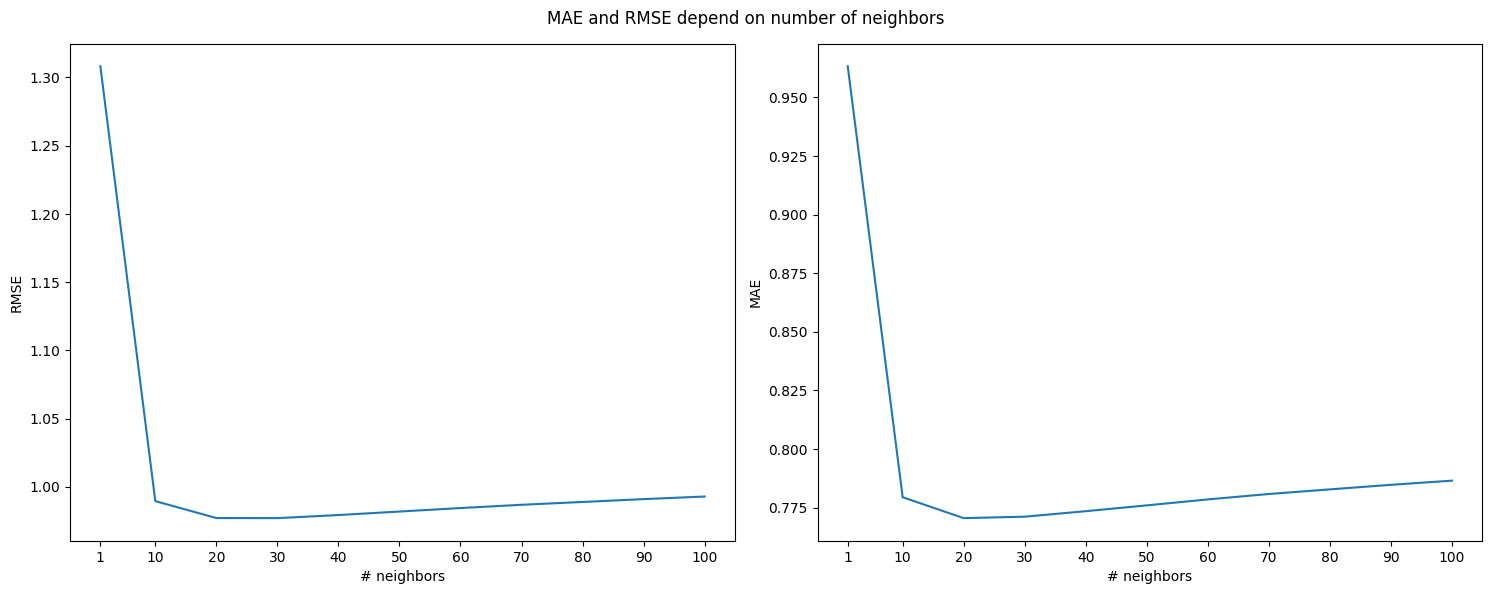

In [26]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
fig.suptitle('MAE and RMSE depend on number of neighbors')
axis[0].plot(param_grid['k'], gs.cv_results['mean_test_rmse'])
axis[1].plot(param_grid['k'], gs.cv_results['mean_test_mae'])
axis[0].set_xlabel('# neighbors') 
axis[0].set_ylabel('RMSE')
axis[1].set_xlabel('# neighbors') 
axis[1].set_ylabel('MAE')
axis[1].set_xticks(param_grid['k'])
axis[0].set_xticks(param_grid['k'])
fig.tight_layout(pad=1)

In [27]:
print("best params", gs.best_score)

best params {'rmse': 0.9770717323794365, 'mae': 0.7705124199958042}


In [28]:
from surprise import SVD

# Заметим, что MAE и RMSE показатели будут немного лучше для SVD модели, чем для KNN, поэтому будем использовать ее в дальнешем построении 
svd = SVD()
svd_results = cross_validate(svd, data, measures=['RMSE', 'mae'], cv = 5)
print(f"Mean RMSE: {svd_results['test_rmse'].mean()}\nMean MAE: {svd_results['test_mae'].mean()}")

Mean RMSE: 0.937519049775501
Mean MAE: 0.7393690148551261


In [29]:
# Обучим нашу модель на всем датасете и получим возможность посчитать матрицу сходств пользователей и предсказать рейтинг фильма для пользователя
trainset = data.build_full_trainset()
svd.fit(trainset)
svd.compute_similarities()
similarities = svd.compute_similarities()
similarities

array([[1.        , 0.27272727, 0.27272727, ..., 0.2       , 0.16666667,
        0.33333333],
       [0.27272727, 1.        , 0.20930233, ..., 0.26666667, 0.27586207,
        0.31818182],
       [0.27272727, 0.20930233, 1.        , ..., 0.17525773, 0.5       ,
        0.21875   ],
       ...,
       [0.2       , 0.26666667, 0.17525773, ..., 1.        , 0.36363636,
        0.26086957],
       [0.16666667, 0.27586207, 0.5       , ..., 0.36363636, 1.        ,
        0.66666667],
       [0.33333333, 0.31818182, 0.21875   , ..., 0.26086957, 0.66666667,
        1.        ]])

In [30]:
from itertools import islice

# Метод для получения рекомендаций на основе обученой модели, где n число рекомендаций
def getRecommendations(model, ratings, movies, user_id, n=1, verbose=0, is_test=False):
    watched_movies = ratings[ratings['user_id'] == user_id]['movie_id'].to_list()
    results = {}
    n = min(n, len(movies.keys()) - len(watched_movies))
    for movie_id in movies.keys():
        if movie_id not in watched_movies:
            results[movie_id] = model.predict(user_id, movie_id)
    results = dict(sorted(results.items(), key=lambda item: -(item[1].est)))

    if verbose != 0:
        index = 0
        print("Movie title \t Expexted rating")
        for key in results.keys():
            if index == n:
                break
            print(f"{movies[key]} \t {results[key].est}")
            index += 1
    if is_test:
        return dict(islice(results.items(), n))
    return [movies[key] for key in list(results.keys())[0:n]]

        

In [31]:
# С помощью модели мы получаем ожидаемый рейтинг фильма 
# и затем выбираем фильмы, ожидаемый рейтинг которых самый высокий.
# Предсказания рейтинга делаются на основе Collaborative-Filtering
getRecommendations(svd, ratings, movies, user_id=2, n=10, verbose=1, is_test=True)

Movie title 	 Expexted rating
Schindler's List (1993) 	 4.7608627415039155
Close Shave, A (1995) 	 4.6551898865990236
Shawshank Redemption, The (1994) 	 4.6487187087564985
North by Northwest (1959) 	 4.6395102133605715
Rear Window (1954) 	 4.611641464670226
Boot, Das (1981) 	 4.585073461800643
Casablanca (1942) 	 4.58169491905277
Great Escape, The (1963) 	 4.580046095182578
Manchurian Candidate, The (1962) 	 4.557509845734067
Citizen Kane (1941) 	 4.545744851987472


{318: Prediction(uid=2, iid=318, r_ui=None, est=4.7608627415039155, details={'was_impossible': False}),
 408: Prediction(uid=2, iid=408, r_ui=None, est=4.6551898865990236, details={'was_impossible': False}),
 64: Prediction(uid=2, iid=64, r_ui=None, est=4.6487187087564985, details={'was_impossible': False}),
 480: Prediction(uid=2, iid=480, r_ui=None, est=4.6395102133605715, details={'was_impossible': False}),
 603: Prediction(uid=2, iid=603, r_ui=None, est=4.611641464670226, details={'was_impossible': False}),
 515: Prediction(uid=2, iid=515, r_ui=None, est=4.585073461800643, details={'was_impossible': False}),
 483: Prediction(uid=2, iid=483, r_ui=None, est=4.58169491905277, details={'was_impossible': False}),
 520: Prediction(uid=2, iid=520, r_ui=None, est=4.580046095182578, details={'was_impossible': False}),
 657: Prediction(uid=2, iid=657, r_ui=None, est=4.557509845734067, details={'was_impossible': False}),
 134: Prediction(uid=2, iid=134, r_ui=None, est=4.545744851987472, detai

## Вопрос 1
Так как наши предсказания строятся на основе предсказания рейтинга для фильма, то ожидаемое MAE и RMSE для n предсказаний можно посчитать на основе MAE и RMSE для одного предсказания. Обозначим известные MAE и RMSE для одного предсказания как $m$ и $r$, а колличество предсказаний $n$. Тогда искомое MAE для $n$ предсказаний будет: $n \cdot m$, а искомое RMSE будет $\sqrt{r^2 \cdot n}$. Динамика в зависимости от n представлена на графике ниже.

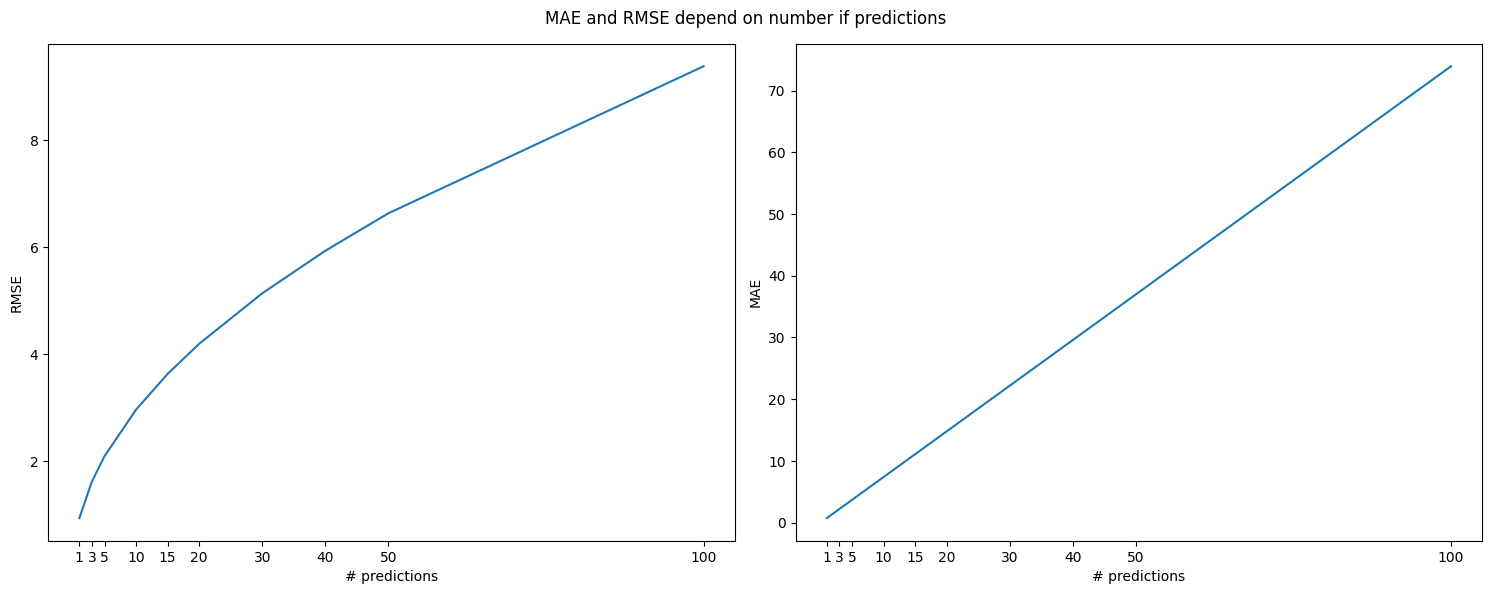

In [32]:
import matplotlib.pyplot as plt
test_n = np.array([1,3,5,10,15,20,30,40,50,100])

fig, axis = plt.subplots(1, 2)
fig.set_size_inches(15, 6)
fig.suptitle('MAE and RMSE depend on number if predictions')
axis[0].plot(test_n, np.sqrt(test_n * (svd_results['test_rmse'].mean() ** 2)))
axis[1].plot(test_n, test_n * svd_results['test_mae'].mean())
axis[0].set_xlabel('# predictions') 
axis[0].set_ylabel('RMSE')
axis[1].set_xlabel('# predictions') 
axis[1].set_ylabel('MAE')
axis[1].set_xticks(test_n)
axis[0].set_xticks(test_n)
fig.tight_layout(pad=1)

## Вопрос 2
Так как мы используем Collaborative-Filtering, то при равенстве оценок будут чаще предлагаться фильмы, у которых большее колличество оценок. Потому что такие фильмы с большей вероятностью попадут в кластер к пользователю, для которого мы строим рекомендацию. Ведь их посмотрело больше людей, и у нас больше шансов, что вкус того, кому рекомендуем фильм, будет похож на вкус тех, кто уже оценил фильм.

## Вопрос 3
В случае, когда мы используем KNN модель из пакета surprise для пользователя, у которого мало соседей (меньше задаваемого порога, по умолчанию этот порог равен 1), оценка ставится, как среднее всех оценок пользователей, посмотревших этот фильм. Конечно, такой подход не может дать точной оценки, и при построении реальной системы для пользователя необходимо указывать, что он еще оставил мало отзывов, чтобы мы могли предоставить ему реливантную рекомендацию. Но в качетсве определенной заглушки такой метод вполне хорошо подходит. При оценках качества модели такие случаи не должны учитываться, потому что они крайние и будут смещать оценки качества.